Importamos las librerias 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el archivo CSV

In [57]:
df = pd.read_csv("NHANES2009-2012.csv")

Miramos la informacion del del CSV

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SurveyYr          10000 non-null  object 
 1   ID                10000 non-null  int64  
 2   Gender            10000 non-null  object 
 3   Age               10000 non-null  int64  
 4   AgeDecade         9667 non-null   object 
 5   AgeMonths         4962 non-null   float64
 6   Race1             10000 non-null  object 
 7   Race3             5000 non-null   object 
 8   Education         7221 non-null   object 
 9   MaritalStatus     7231 non-null   object 
 10  HHIncome          9189 non-null   object 
 11  HHIncomeMid       9189 non-null   float64
 12  Poverty           9274 non-null   float64
 13  HomeRooms         9931 non-null   float64
 14  HomeOwn           9937 non-null   object 
 15  Work              7771 non-null   object 
 16  Weight            9922 non-null   float64

In [59]:
num_filas, num_columnas = df.shape

variables_numericas = [col for col in df.select_dtypes(include=['int64', 'float64']).columns
                        if col != 'ID'
                      ]
variables_categoricas = df.select_dtypes(exclude="number").columns.tolist()

info_general = {
    "Filas": num_filas,
    "Columnas": num_columnas,
    "Variables numéricas": len(variables_numericas),
    "Variables categóricas": len(variables_categoricas)
}

print("Información general:")
print(info_general)


Información general:
{'Filas': 10000, 'Columnas': 75, 'Variables numéricas': 44, 'Variables categóricas': 30}


Algunas columnas del dataset usan valores especiales para representar
respuestas no válidas o faltantes, por ejemplo:
 - 9999: "No responde" o "No aplica"
 - 7777: "Desconocido"
- 'Refused': participante rechazó responder
Los reemplazamos con pd.NA, que es el formato estándar de "faltante" en pandas

In [61]:
df.replace({9999: pd.NA, 7777: pd.NA, 'Refused': pd.NA}, inplace=True)

Sacamos las tendencias de medida central

In [62]:
medidas_centrales= df[variables_numericas].describe()
print("\n Tendencia central y dispersión:")
print(medidas_centrales)


 Tendencia central y dispersión:
                Age    AgeMonths    HHIncomeMid      Poverty    HomeRooms  \
count  10000.000000  4962.000000    9189.000000  9274.000000  9931.000000   
mean      36.742100   420.123942   57206.170421     2.801844     6.248918   
std       22.397566   259.043091   33020.276584     1.677909     2.277538   
min        0.000000     0.000000    2500.000000     0.000000     1.000000   
25%       17.000000   199.000000   30000.000000     1.240000     5.000000   
50%       36.000000   418.000000   50000.000000     2.700000     6.000000   
75%       54.000000   624.000000   87500.000000     4.710000     8.000000   
max       80.000000   959.000000  100000.000000     5.000000    13.000000   

            Weight      Length   HeadCirc       Height          BMI  ...  \
count  9922.000000  543.000000  88.000000  9647.000000  9634.000000  ...   
mean     70.981798   85.016022  41.180682   161.877838    26.660136  ...   
std      29.125357   13.705026   2.311483   

Boxplot para ver la dispersion de los datos

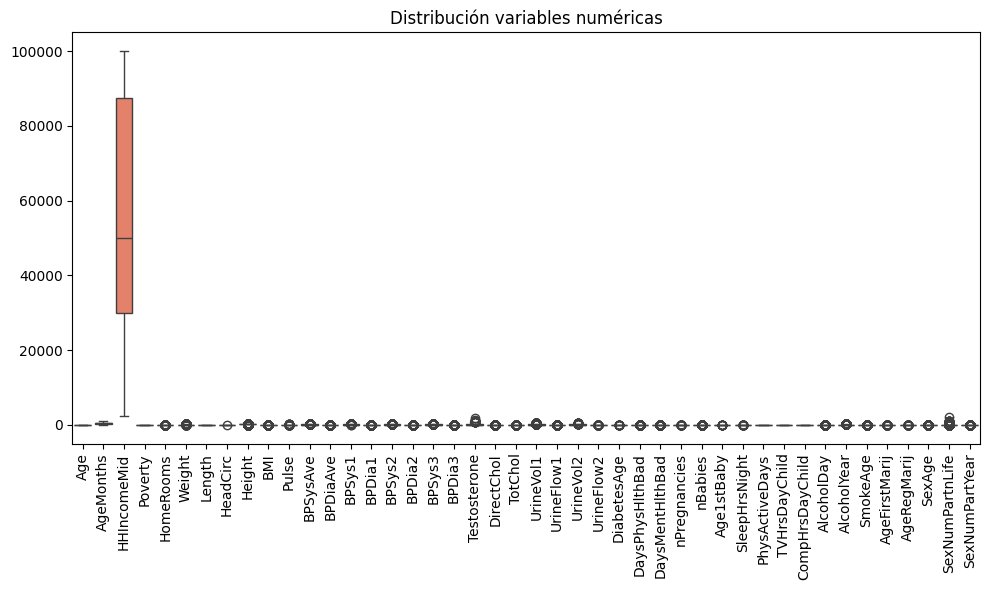

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[variables_numericas].select_dtypes(include='number'))
plt.xticks(rotation=90)
plt.title("Distribución variables numéricas")
plt.tight_layout()
plt.savefig("boxplot_variables_numericas.png")
plt.show()

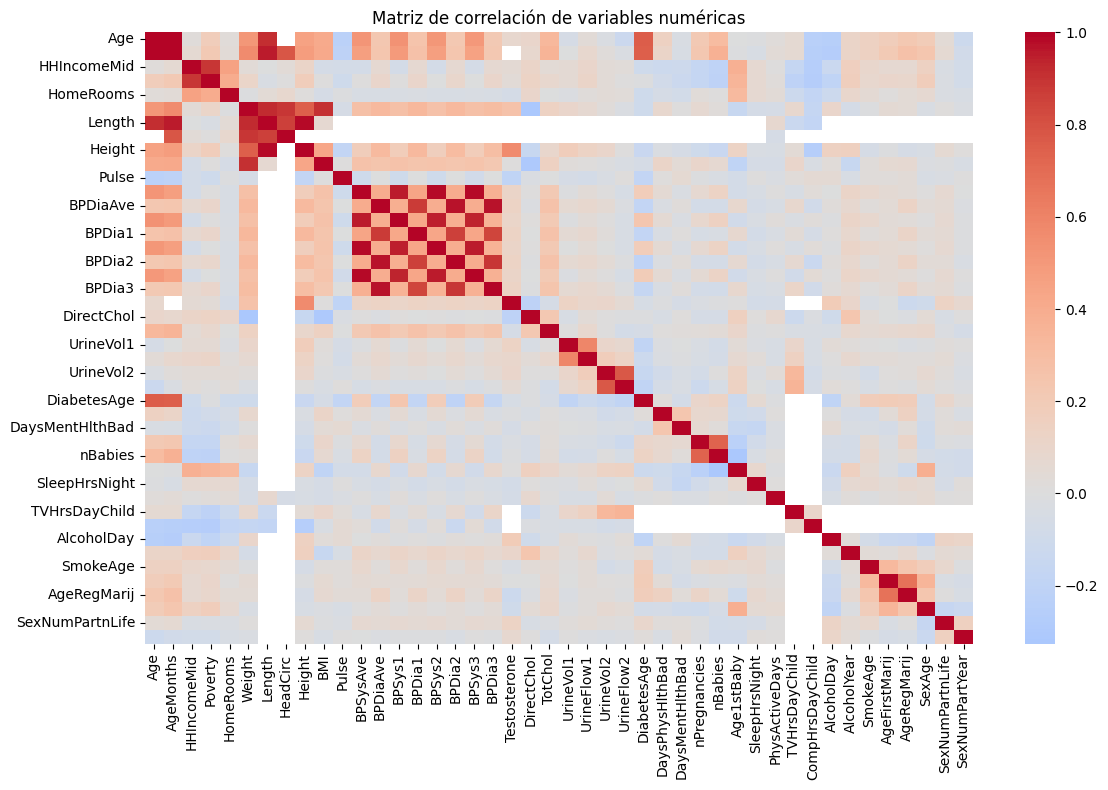

In [64]:
correlacion = df[variables_numericas].corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion, cmap="coolwarm", center=0)
plt.title("Matriz de correlación de variables numéricas")
plt.tight_layout()
plt.savefig("correlacion_variables_numericas.png")
plt.show()


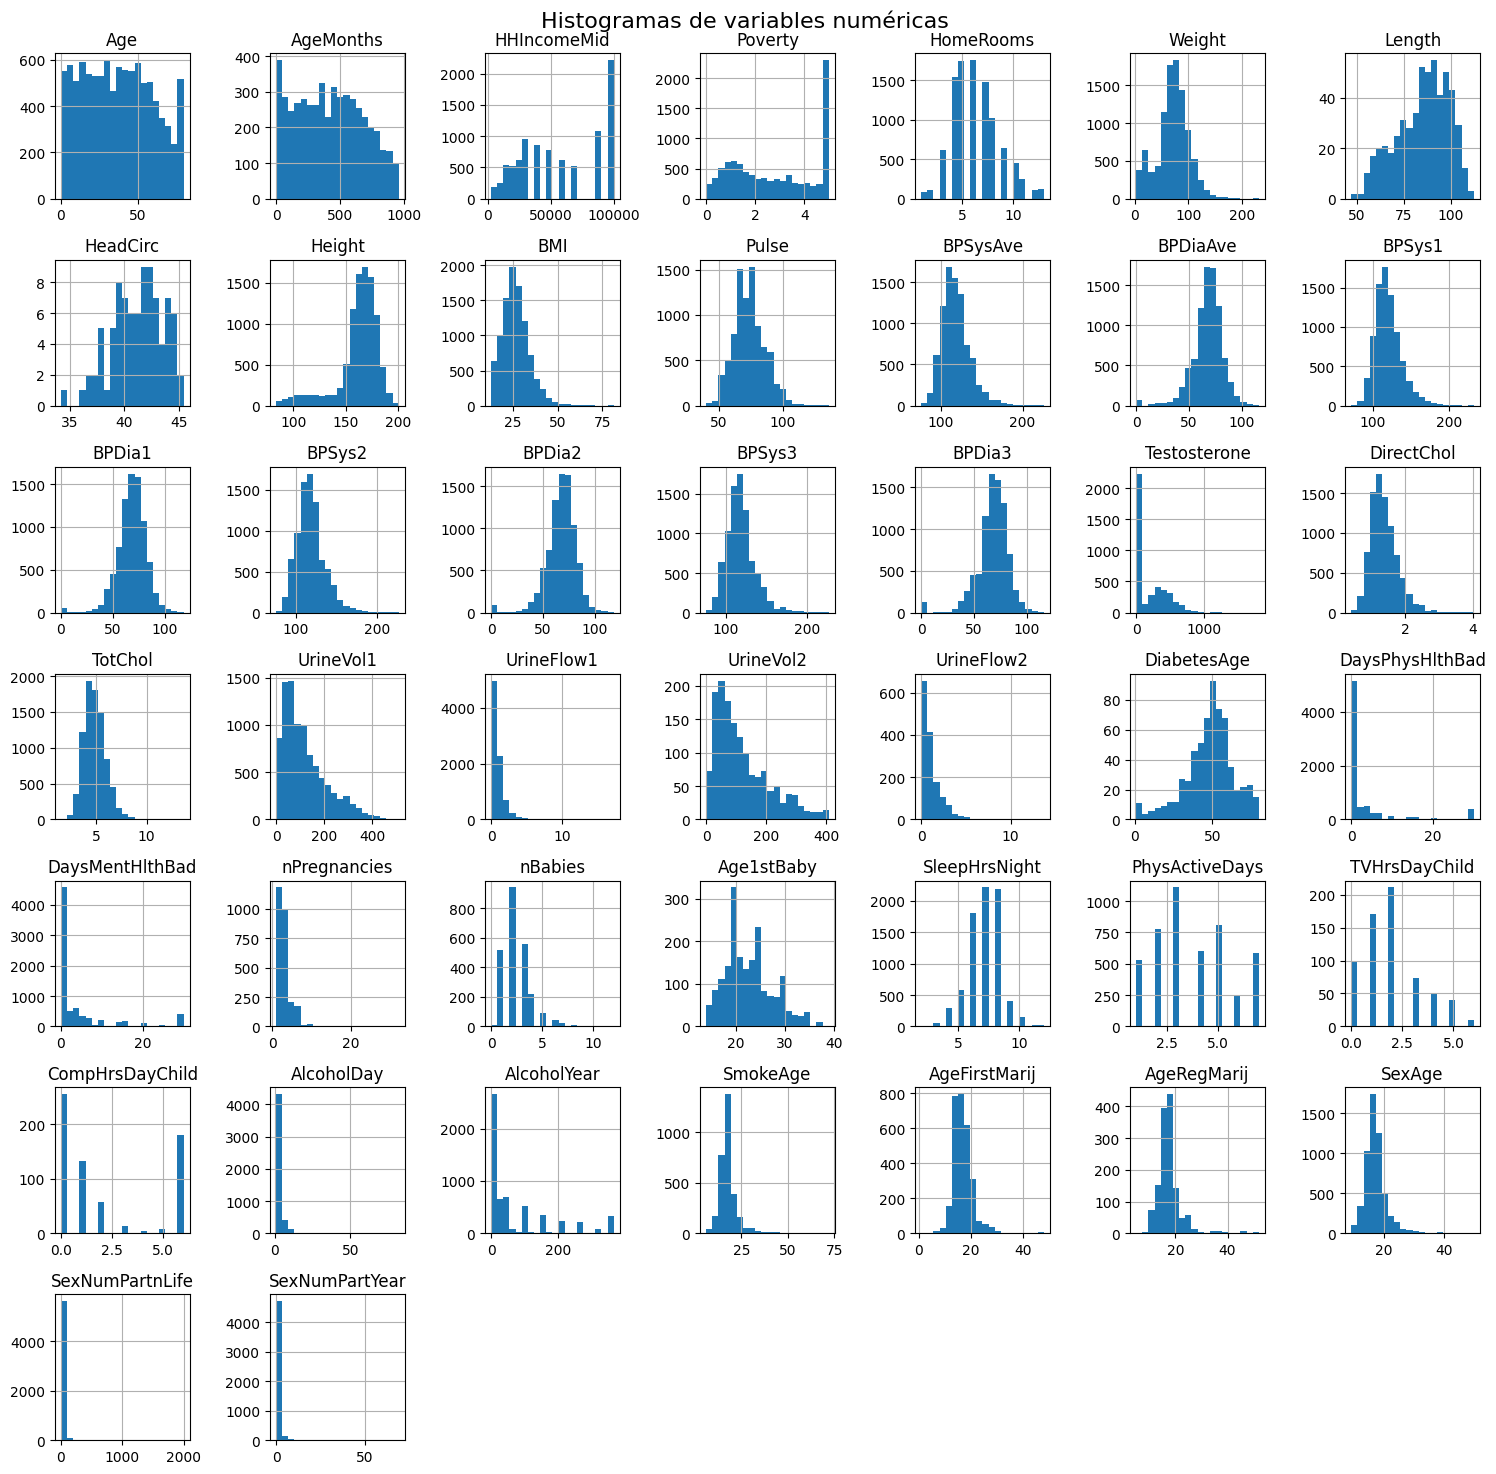

In [65]:
df[variables_numericas].hist(figsize=(15, 15), bins=20)
plt.suptitle("Histogramas de variables numéricas", fontsize=16)
plt.tight_layout()
plt.savefig("histogramas_variables_numericas.png")
plt.show()

In [66]:
valores_nulos = df.isnull().sum()
valores_nulos[valores_nulos > 0]

AgeDecade           333
AgeMonths          5038
Race3              5000
Education          2779
MaritalStatus      2769
                   ... 
SexAge             4460
SexNumPartnLife    4275
SexNumPartYear     5072
SameSex            4232
SexOrientation     5158
Length: 70, dtype: int64